#Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.datasets import mnist

#Importing the dataset

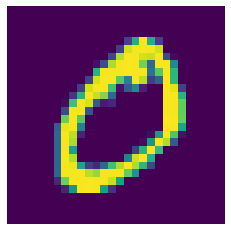

Value: 0


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[1])
plt.axis('off')
plt.show()
print('Value:',y_train[1])

In [3]:
print('Shape :', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape : (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# Reshaping the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print('Shape :', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape : (60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [5]:
#Making the value of the array in the range of 0 to 1
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.utils import to_categorical 
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [7]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#Creating the neural network

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),

    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),

    layers.Conv2D(16, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 16)          0

#Compiling the model

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    verbose = 1
)

Epoch 1/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.5402 - accuracy: 0.8210
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.2489 - accuracy: 0.9199
Epoch 3/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.2043 - accuracy: 0.9335
Epoch 4/10
1875/1875 [==============================] - 112s 59ms/step - loss: 0.1793 - accuracy: 0.9430
Epoch 5/10
1875/1875 [==============================] - 151s 80ms/step - loss: 0.1643 - accuracy: 0.9462
Epoch 6/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1591 - accuracy: 0.9485
Epoch 7/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.1454 - accuracy: 0.9519
Epoch 8/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1454 - accuracy: 0.9532
Epoch 9/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.1347 - accuracy: 0.9557
Epoch 10/10
1875/1875 [==============================] 

In [12]:
history.params

{'epochs': 10, 'steps': 1875, 'verbose': 1}

In [13]:
acc = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Training ana Loss')

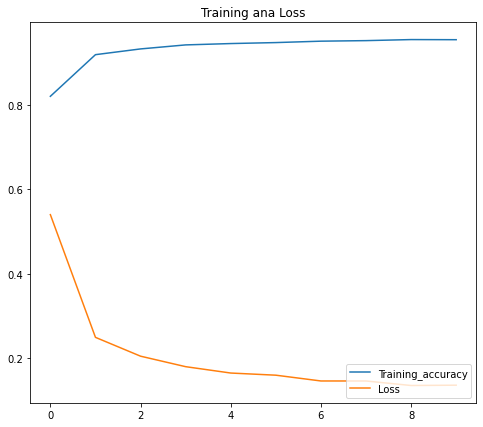

In [14]:
plt.figure(figsize = (8,7))
plt.plot(range(10), acc, label = 'Training_accuracy')
plt.plot(range(10), loss, label = 'Loss')
plt.legend(loc = 'lower right')
plt.title('Training ana Loss')

#Making prediction

Image to predict :
Actual value : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted value : [3]


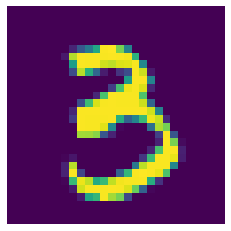

In [18]:
i = 657
img = X_test[i]
img = img.reshape((28, 28))
print('Image to predict :')
plt.imshow(img)
plt.axis('off')
print('Actual value :', y_test[i])

prediction = model.predict(X_test[np.newaxis, i])
prediction = prediction.argmax(axis = 1)
print('Predicted value :', prediction)

#Saving the model

In [16]:
model.save('digit_classification.h5')